In [1]:
import sys

sys.path.append("..")
sys.path.append("../..")
sys.path.append("../../src")

import os
import matplotlib.pyplot as plt
import numpy as np
from functional_autoencoders.util import pickle_load

In [2]:
# MODEL_NAME = "cnn"
MODEL_NAME = "point"
DATA_OUTPUT_DIR = os.path.join(
    "../../tmp/experiments/exp_baseline_comparisons", MODEL_NAME, "data"
)

results = {}
for run_idx_str in os.listdir(DATA_OUTPUT_DIR):
    path_results = os.path.join(DATA_OUTPUT_DIR, run_idx_str, "data.pickle")
    results[int(run_idx_str)] = pickle_load(path_results)

In [3]:
plt.rcParams["figure.figsize"] = (12, 3)

mse_test_array = np.zeros(len(results))
for run_idx in results:
    training_results = results[run_idx]["training_results"]
    mse = training_results["metrics_history"]["MSE (in L^{2})"][-1]
    mse_test_array[run_idx] = mse


print(f"Mean MSE: {np.mean(mse_test_array):.2e}")
print(f"Std MSE: {np.std(mse_test_array):.2e}")

Mean MSE: 4.82e-04
Std MSE: 2.57e-05


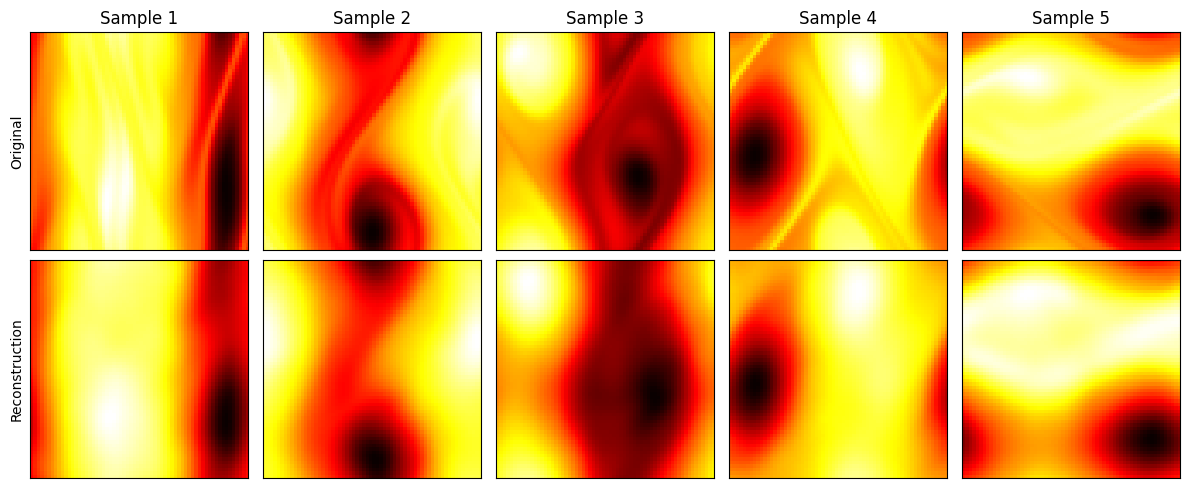

In [4]:
plt.rcParams["figure.figsize"] = (12, 5)

N = 64
N_RECS = 5  # Number of reconstructions to show (can go higher)
RUN_IDX = 0

reconstructions = results[RUN_IDX]["reconstructions"]

u = reconstructions["u"]
u_hat = reconstructions["u_hat"]
x = reconstructions["x"]

for i in range(N_RECS):
    plt.subplot(2, N_RECS, i + 1)
    plt.imshow(u[i].reshape(N, N), cmap="hot")
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel("Original")
    plt.title(f"Sample {i + 1}")

    plt.subplot(2, N_RECS, i + 1 + N_RECS)
    plt.imshow(u_hat[i].reshape(N, N), cmap="hot")
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel("Reconstruction")

plt.tight_layout()
plt.show()